Importing libraries and dependencies necessary for the project

In [199]:
import pandas as pd
import pandas_ta as ta
import numpy as np

import yfinance as yf
import requests

import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.style.use("fivethirtyeight")
import seaborn as sns

from dotenv import load_dotenv
load_dotenv()
%matplotlib inline

*Creating a function that calculates the Cumulative Returns:*

In [200]:
def cumulative_returns(df):
    dfc = df.copy()
    rt = ((1 + dfc).cumprod() - 1) *100
    return rt

*Creating a function that generates the Fibonacci Retracement Sequence:*

In [201]:
def fibonacci_sequence(n):
    """
    Description
    -----------
    This function generates a sequence of numbers that is the sum of the two that precede it.
    
    Parameters
    ----------
    Next number generated: It is the sum of the last number with the second last one added to the sequence.

    Example (Xn+2= Xn+1 + Xn)
    --------
    float = [0,2]
    for i in range(3,n+1):
        next_number = 4 + 6
        float.append(next_number)
    return float
    
    Returns
    --------
    Numeric - Sequence of numbers
    "[0,2,2,4,6,10,16...]"
    """
    sequence = [0,1]
    for i in range(2,n+1):
        next_num = sequence[-1] + sequence[-2]
        sequence.append(next_num)
    return sequence

# PART ONE: CRYPTO ANALYSIS!

In [202]:
# Setting up Variables:

cryptocurrencies = ['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD']

indices = ["^GSPC"] # S&P500 Index price movement for three years


*I want to analyze the Crypto Market - Before, - During, - After the Covid-19 Lockdown Period:*

In [203]:
# Downloading data from Yahoo Finance API
start_date_pre_lockdown = "2019-03-14"
end_date_pre_lockdown = "2020-04-01"
crypto_data_before_lockdown = yf.download(cryptocurrencies, start_date_pre_lockdown, end_date_pre_lockdown)


start_date_pandemic_lockdown = "2020-04-01"
end_date_pandemic_lockdown = "2021-04-30"
crypto_data_during_lockdown = yf.download(cryptocurrencies, start_date_pandemic_lockdown, end_date_pandemic_lockdown)


start_date_after_locksown = "2021-05-01"
end_date_after_lockdown = "2022-05-02"
crypto_data_after_lockdown = yf.download(cryptocurrencies, start_date_after_locksown, end_date_after_lockdown)

stock_market_data = yf.download(indices, start_date_pre_lockdown,end_date_after_lockdown)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [204]:
# Creating a plot of the S&P 500 Index price movement to demostrate an overall performance of the US Stock Market for all three periods that I am analyzing!

#The S&P 500 is a stock market index that tracks the stocks of 500 large-cap U.S. companies. 
# It represents the stock market's performance by reporting the risks and returns of the biggest companies. 
# Investors use it as the benchmark of the overall market, to which all other investments are compared

stock_market_data["Close"].hvplot(
    label = "Closing prices of S&P 500 Index for last three years",
    width = 900,
    height = 400
)

:Curve   [Date]   (Close)

## Crypto Analysis: I - Before Covid-19 Lockdown Period:

In [205]:
# Creating a plot of the price movement for Cryptocurrencies before the Covid-19 lockdown period!

pre_lockdown_closing_prices = crypto_data_before_lockdown["Close"]
pre_lockdown_closing_prices.hvplot(
    label = "Closing prices for Bitcoin, Ethereum, Cordana, Binance before the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [206]:
# Creating a plot of daily returns for Cryptocurrencies before the Covid-19 lockdown period, 
# daily returns have a better way of demonstrating of what would have happened on certain dates 
# if you have invested in any crypto and what would have been the percentage return on that specific date.

daily_returns_before_lockdown=pre_lockdown_closing_prices.pct_change().dropna()
daily_returns_before_lockdown.hvplot(
    label = "Daily returns for Bitcoin, Ethereum, Cordana, Binance before the Covid-19 Lockdown period",
    width = 900,
    height = 400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

#### Volatility before Covid-19 Lockdown period:

In [207]:

#Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.
# By using the describe function we can have a better understanding of the overall performance during this period.

daily_returns_before_lockdown.describe()

# We can see from the Standard deviation that Cordana has a higher volatility than the rest of the other Cryptos!

,ADA-USD,BNB-USD,BTC-USD,ETH-USD
count,384.000000,384.000000,384.000000,384.000000
mean,0.000295,0.000845,0.002322,0.001314
std,0.052687,0.048925,0.042854,0.048688
min,-0.395672,-0.419046,-0.371695,-0.423472
25%,-0.027511,-0.022718,-0.015523,-0.018301
50%,0.002007,-0.000851,0.001049,0.000209
75%,0.025692,0.023411,0.019215,0.021533
max,0.201887,0.213507,0.181878,0.189404


In [208]:
# Creating a plot of cumulative returns for Cryptocurrencies before the Covid-19 lockdown period, 
# cumulative return indicates the aggregate effect of price change on the value of your investment. 
# The cumulative return doesn't always equate to an accumulation of wealth. A cumulative return can be negative:
# If you bought BTC on March 1 2020 for $8562 and it is trading at $4963 a year later, your cumulative return is negative:
# ( $4963 - $8562 ) / $8562 = -0.42034571361831347 = (42%)

cumulative_return_before_lockdown = cumulative_returns(daily_returns_before_lockdown)
cumulative_return_before_lockdown.hvplot(
    label = "Cumulative returns for Bitcoin, Ethereum, Cordana, Binance before the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

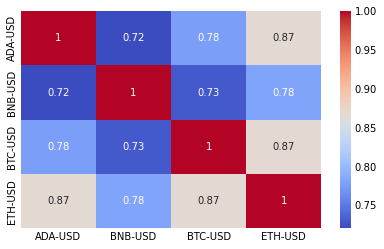

In [209]:
# Creating a heatmap of correlation between Cryptocurrencies before the Covid-19 lockdown period:
# Correlation is an indicator that shows if there is a mutual relationship or connection between each Crypto.
# Here we can see that Bitcoin and Ethereum have a high correlation of 87%, also Binance shows a correlation of 78% with Ethereum and 73% with Bitcoin.

correlation_before_lockdown = daily_returns_before_lockdown.corr()
sns.heatmap(correlation_before_lockdown, annot=True, cmap='coolwarm')

## Crypto Analysis: II - During Covid-19 Lockdown Period:

In [210]:
# Creating a plot of the price movement for Cryptocurrencies during the Covid-19 lockdown period!

closing_prices_during_lockdown = crypto_data_during_lockdown["Close"]
closing_prices_during_lockdown.hvplot(
    label = "Closing prices for Bitcoin, Ethereum, Cordana, Binance during the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [211]:
# Creating a plot of daily returns for Cryptocurrencies during the Covid-19 lockdown period, 
# Daily returns have a better way of demonstrating of what would have happened on certain dates 
# if you have invested in any crypto and what would have been the percentage return on that specific date.

daily_returns_during_lockdown=closing_prices_during_lockdown.pct_change().dropna()
daily_returns_during_lockdown.hvplot(
    label = "Daily returns for Bitcoin, Ethereum, Cordana, Binance during the Covid-19 Lockdown period",
    width = 900,
    height = 400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

#### Volatility during Covid-19 Lockdown period:

In [212]:
# Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.
# By using the describe function we can have a better understanding of the overall performance during this period

daily_returns_during_lockdown.describe()

# We can see from the Standard deviation that Binance has a higher volatility than the rest of the other Cryptos!


,ADA-USD,BNB-USD,BTC-USD,ETH-USD
count,394.000000,394.000000,394.000000,394.000000
mean,0.011514,0.011892,0.006121,0.008759
std,0.062583,0.066642,0.035031,0.046574
min,-0.173644,-0.230483,-0.132837,-0.188605
25%,-0.022022,-0.016517,-0.011263,-0.015899
50%,0.006245,0.005304,0.003514,0.006600
75%,0.035503,0.032450,0.020284,0.033541
max,0.322384,0.697604,0.187465,0.259475


In [251]:
# Creating a plot of cumulative returns for Cryptocurrencies during the Covid-19 lockdown period, 
# cumulative return indicates the aggregate effect of price change on the value of your investment. 
# The cumulative return doesn't always equate to an accumulation of wealth. A cumulative return can be negative:
# If you bought BTC on March 1 2021 for $4963 and it is trading at $44354.63 a year later, your cumulative return is:
# ( $44354 - $4963 ) / $4963 = 7.9369  OR IN PERCENTAGE THIS WILL BE 793.69% UNBELIEVABLE!!!!! 

cumulative_return_during_lockdown = cumulative_returns(daily_returns_during_lockdown)
cumulative_return_during_lockdown.hvplot(
    label = "Cumulative returns for Bitcoin, Ethereum, Cordana, Binance during the Covid-19 Lockdown period",
    width = 900,
    height = 400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

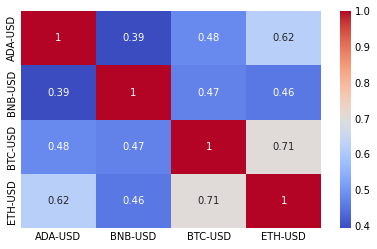

In [214]:
# Creating a heatmap of correlation between Cryptocurrencies during the Covid-19 lockdown period:
# Correlation is an indicator that shows if there is a mutual relationship or connection between each Crypto.
# Here we can see that Bitcoin and Ethereum have a high correlation of 71%, Cordana has a correlation of 48% with Bitcoin and also Binance shows a correlation of 47% with Bitcoin.
# It is clear that a lot of things have changed and also the correlation between Cryptos has changed a lot from the previous year! 

correlation = daily_returns_during_lockdown.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## Crypto Analysis: III - After Covid-19 Lockdown Period:

In [215]:
# Creating a plot of the price movement for Cryptocurrencies after the Covid-19 lockdown period!
closing_prices_after_lockdown = crypto_data_after_lockdown["Close"]
closing_prices_after_lockdown.hvplot(
    label = "Closing prices for Bitcoin, Ethereum, Cardano, Binance after the Covid-19 Lockdown period",
    width = 900,
    height = 400
    )

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [216]:
# Creating a plot of daily returns for Cryptocurrencies after the Covid-19 lockdown period, 
# Daily returns have a better way of demonstrating of what would have happened on certain dates 
# if you have invested in any crypto and what would have been the percentage return on that specific date.

daily_returns_after_lockdown=closing_prices_after_lockdown.pct_change().dropna()
daily_returns_after_lockdown.hvplot(
    label = "Daily returns for Bitcoin, Ethereum, Cardano, Binance after the Covid-19 Lockdown period",
    width = 900,
    height = 400
)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

#### Volatility after Covid-19 Lockdown period:

In [217]:
#Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.
# By using the describe function we can have a better understanding of the overall performance during this period

daily_returns_after_lockdown.describe()

# We can see from the Standard deviation that Cordana has a higher volatility than the rest of the other Cryptos!

,ADA-USD,BNB-USD,BTC-USD,ETH-USD
count,366.000000,366.000000,366.000000,366.000000
mean,0.000127,0.000110,-0.000390,0.001177
std,0.057354,0.051794,0.037887,0.050000
min,-0.260094,-0.332656,-0.137661,-0.272003
25%,-0.032901,-0.024087,-0.022073,-0.023932
50%,-0.001550,0.001260,0.000527,0.002663
75%,0.026416,0.025840,0.020733,0.028655
max,0.245298,0.313236,0.145412,0.253136


In [252]:
# Creating a plot of cumulative returns for Cryptocurrencies during the Covid-19 lockdown period, 
# cumulative return indicates the aggregate effect of price change on the value of your investment. 
# The cumulative return doesn't always equate to an accumulation of wealth. A cumulative return can be negative:
# If you bought BTC on March 1 2022 for $$44354.63 and it is trading at ( Hypothetically ) $100000 a year later, your cumulative return will be:
# ( $100000 - $44354.63 ) / $44354.63 =  1.2545 OR IN PERCENTAGE THIS WILL BE 125.45% UNBELIEVABLE!!!!! 

cumulative_return_after_lockdown = cumulative_returns(daily_returns_after_lockdown)
cumulative_return_after_lockdown.hvplot(label = "Cumulative returns for Bitcoin, Ethereum, Cardano, Binance after the Covid-19 Lockdown period",
    width = 900,
    height = 400)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

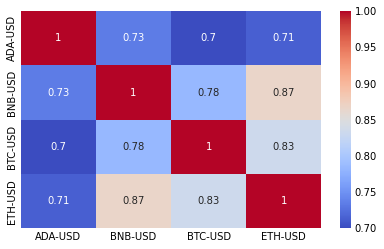

In [219]:
# Creating a heatmap of correlation between Cryptocurrencies after the Covid-19 lockdown period:
# Correlation is an indicator that shows if there is a mutual relationship or connection between each Crypto.
# Here we can see that Bitcoin shows a high correlation of 83% with Ethereum and 70% with Cordana; 
# Also Binance shows a correlation of 87% with Ethereum, and 78% with Bitcoin.
# It is clear that a lot of things have changed and also the correlation between Cryptos has changed a lot from the previous year! 

correlation_after_lockdown = daily_returns_after_lockdown.corr()
sns.heatmap(correlation_after_lockdown, annot=True, cmap='coolwarm')

# PART TWO: BITCOIN ANALYSIS USING FIBONACCI RETRACEMENT!

## BTC Analysis: I - Before Covid-19 Lockdown Period:

In [220]:
# Downloading data from Yahoo Fiance API for Bitcoin before Covid-19 Lockdown period:

BTC = yf.download("BTC-USD", start_date_pre_lockdown, end_date_pre_lockdown)
BTC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,3905.576904,3946.504395,3901.296875,3924.369141,3924.369141,10480789570
2019-03-15,3926.663330,3968.542969,3914.015381,3960.911133,3960.911133,9394210605
2019-03-16,3963.900146,4077.036377,3961.657471,4048.725830,4048.725830,9856166973
2019-03-17,4047.719482,4054.122070,4006.411133,4025.229004,4025.229004,8221625400
2019-03-18,4029.968506,4071.556641,4009.117188,4032.507324,4032.507324,9646954186
...,...,...,...,...,...,...
2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,6242.193848,34885225901
2020-03-29,6245.624512,6250.467285,5920.085938,5922.042969,5922.042969,28373690931
2020-03-30,5925.538574,6517.195801,5903.234375,6429.841797,6429.841797,37101651525


In [221]:
# Cleaning data and Creating a variable for Bitcoin Closing prices, before Covid-19 Lockdown period:

BTC_closing_before_ld = BTC["Close"].hvplot(
    label = "Bitcoin Closing Prices before Covid-19 lockdown",
    width = 900,
    height = 400
)
BTC_closing_before_ld

:Curve   [Date]   (Close)

*The Fibonacci Sequence:*


In [222]:
# Creating and generating the Fibonacci Sequence of 20 numbers through a function created for this Project!

sequence = fibonacci_sequence(20)
print(sequence)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


*What are Fibonacci retracements?*

In [223]:
#Fibonacci retracements are particular key levels calculated according to 2 swings, i.e. inversion points. 
# The idea behind Fibonacci retracements is to create some key levels in the price range between these two swings according to pre-defined fractions. 
# The most important fraction is 0.618, which is related to the golden ratio (1.618…). That’s why they are called Fibonacci retracements. Other ratios are 0.5, 0.236, 0.382, 0.786.

for i in sequence:
    rt_1 = sequence[-4] / sequence[-1]
    rt_2 = 0.5
    rt_3 = sequence[-3] / sequence[-1]    
    rt_4 = sequence[-2] / sequence[-1]
    rt_5 = 1 - rt_1

print(rt_1,rt_2,rt_3,rt_4,rt_5)

0.2360679970436068 0.5 0.3819660014781966 0.6180339985218034 0.7639320029563932


In [224]:
# Calculating the Fibonacci Retracement Level Prices and a non_Fibonacci Level/Ratio of 0.5 or 50%. 
# Three Fibonacci Ratios are what I am going to use: 0.236, 0.382 and 0.618

max_price = BTC["Close"].max()
min_price = BTC["Close"].min()

diff = max_price - min_price

print("Level Percentage      Price in USD ")
print("00.0%\t\t", max_price)

first_lvl = diff * rt_1
print("23.6%\t\t", first_lvl)

second_lvl = diff * rt_2
print("38.2%\t\t", second_lvl)

third_lvl = diff * rt_3
print("50.0%\t\t", third_lvl)

fourth_lvl = diff * rt_4
print("61.8%\t\t", fourth_lvl)

fifth_lvl = diff * rt_5
print("76.5%\t\t", fifth_lvl)

print("100.0%\t\t", min_price)

Level Percentage      Price in USD 
00.0%		 13016.2314453125
23.6%		 2146.297723663849
38.2%		 4545.93115234375
50.0%		 3472.7822905118255
61.8%		 5619.0800141756745
76.5%		 6945.564581023651
100.0%		 3924.369140625


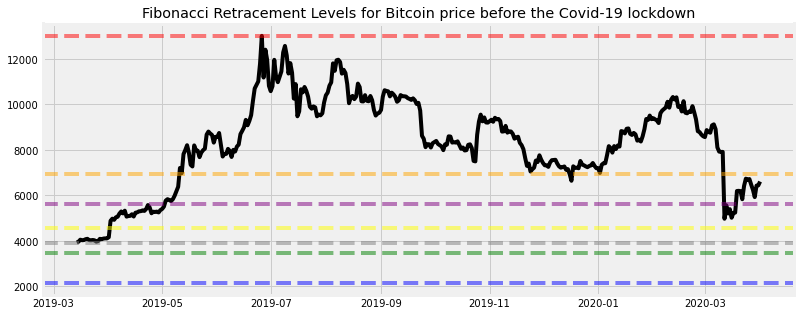

In [225]:
# Plotting the Fibonacci Level Prices with the Close price for Bitcoin during Covid-19 Lockdown

plt.figure(figsize=(12,5))
plt.plot(BTC.index, BTC["Close"], color = "black")

plt.xlabel = ("Date")
plt.ylabel = ("Price in (USD)")
plt.title("Fibonacci Retracement Levels for Bitcoin price before the Covid-19 lockdown")

plt.axhline(max_price, linestyle = "--", alpha = 0.5, color = "red")
plt.axhline(first_lvl, linestyle = "--", alpha = 0.5, color = "blue")
plt.axhline(second_lvl, linestyle = "--", alpha = 0.5, color = "yellow")
plt.axhline(third_lvl, linestyle = "--", alpha = 0.5, color = "green")
plt.axhline(fourth_lvl, linestyle = "--", alpha = 0.5, color = "purple")
plt.axhline(fifth_lvl, linestyle = "--", alpha = 0.5, color = "orange")
plt.axhline(min_price, linestyle = "--", alpha = 0.5, color = "gray")

# Fibonacci retracements are very popular among traders and it’s very important to use this tool in a wide time range in order to increase the Reward/Risk ratio.
# Obviously, this tool must not be used alone, I need to build a complete strategy exploiting, for example, multi-timeframe analysis. 
# But, that will be on the next Project as a continuation of this one. 

#### Moving Averages:
##### Moving averages are measures of momentum over a series of observed values. These measures are commonly made across a subset of values within a larger set. This subset, known as the lookback period, offers different functional insights based on its value.


In [226]:
# In our case we have to use 10 and 5 days moving averages because we have only one year (not enough data). ATTENTION: This model is only for education purposes and we are using a 1-4 scale!
# Simple Moving Average (SMA): Represents the mean value across a period of n-previous observations. Common lookback periods include 50, 100, and 200-period trailing values.
# Exponential Moving Average (EMA): Represents a weighted mean across a period of n-previous observations where values closest to the most recent are given exponentially larger consideration.

simple_AND_exponential_moving_averages = ta.Strategy(
    name = "moving indicators",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "ema", "length": 5},
    ]
)
BTC.ta.strategy(simple_AND_exponential_moving_averages)
BTC.ta.cores = 0

In [227]:
fig = go.Figure(data=[
    go.Candlestick(
        x=BTC.index,
        open=BTC['Open'],
        high=BTC['High'],
        low=BTC['Low'],
        close=BTC['Close'],
        increasing_line_color='orange',
        decreasing_line_color='black',
        showlegend=False,
    ),
])
fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['SMA_10'],
        line=dict(color='red', width=2),
        name='SMA_10',
    )
)

fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['EMA_5'],
        line=dict(color='green', width=2),
        name='EMA_5'
    )
)
fig.update_layout(height=600, showlegend=True)
fig.show()


##### In this visualization, we can see the 10-period simple moving average (red line) charting against the 5-period exponential moving average (green line.) Visualized together, we can see a shift in momentum in many areas where the EMA crosses the SMA. Given the EMA reflects a faster change in price momentum, this crossover pattern is often used as a composite technical indicator to forecast emerging price trends.

In [228]:
# Golden Cross:
# The golden cross occurs when a short-term moving average crosses over a major long-term moving average to the upside and is interpreted by analysts and traders as signaling a definitive upward turn in a market. 
# Basically, the short-term average trends up faster than the long-term average, until they cross.

BTC['golden_cross'] = np.where(BTC['SMA_10'] > BTC['EMA_5'],"SELL","BUY")
BTC.dropna(inplace=True)

In [229]:
# Death Cross:
# Conversely, a similar downside moving average crossover constitutes the death cross and is understood to signal a decisive downturn in a market. 
# The death cross occurs when the short-term average trends down and crosses the long-term average, basically going in the opposite direction of the golden cross.

BTC['death_cross'] = np.where(BTC['SMA_10'] < BTC['EMA_5'],"SELL","BUY")
BTC.dropna(inplace=True)
BTC

,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_5,golden_cross,death_cross
Date,,,,,,,,,,
2019-03-23,4022.713379,4049.882568,4015.964600,4035.826416,4035.826416,9578850549,4023.953052,4034.722718,BUY,SELL
2019-03-24,4035.163574,4040.699707,4006.192871,4022.168213,4022.168213,9144851065,4033.732959,4030.537883,SELL,BUY
2019-03-25,4024.112793,4038.840820,3934.031250,3963.070557,3963.070557,10359818883,4033.948901,4008.048774,SELL,BUY
2019-03-26,3969.228760,3985.080811,3944.753174,3985.080811,3985.080811,10707678815,4027.584399,4000.392786,SELL,BUY
2019-03-27,3984.244873,4087.066162,3977.810547,4087.066162,4087.066162,10897131934,4033.768115,4029.283912,SELL,BUY
...,...,...,...,...,...,...,...,...,...,...
2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,6242.193848,34885225901,6366.590674,6417.520240,BUY,SELL
2020-03-29,6245.624512,6250.467285,5920.085938,5922.042969,5922.042969,28373690931,6339.675684,6252.361149,SELL,BUY
2020-03-30,5925.538574,6517.195801,5903.234375,6429.841797,6429.841797,37101651525,6362.782031,6311.521365,SELL,BUY


## BTC Analysis: II - During Covid-19 Lockdown Period:

In [230]:
# Downloading data from Yahoo Fiance API for Bitcoin during Covid-19 Lockdown period:

BTC = yf.download("BTC-USD", start_date_pandemic_lockdown, end_date_pandemic_lockdown)
BTC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,6606.776367,40346426266
2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,6793.624512,47660646124
2020-04-03,6797.396484,7003.220703,6673.335938,6733.387207,6733.387207,38976504903
2020-04-04,6738.382812,6878.953613,6696.484863,6867.527344,6867.527344,33185988584
2020-04-05,6862.537598,6883.414062,6715.929199,6791.129395,6791.129395,29510409856
...,...,...,...,...,...,...
2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825
2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757
2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955


In [231]:
# Cleaning data and Creating a variable for Bitcoin Closing prices during Covid-19 Lockdown period:

BTC_closing_during_ld = BTC["Close"].hvplot(
    label = "Bitcoin Closing Prices during Covid-19 lockdown",
    width = 900,
    height = 400
)
BTC_closing_during_ld

:Curve   [Date]   (Close)

*The Fibonacci Sequence:*


In [232]:
# Creating and generating the Fibonacci Sequence of 20 numbers through a function created for this Project!

sequence = fibonacci_sequence(20)
print(sequence)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


*What are Fibonacci retracements?*

In [233]:
#Fibonacci retracements are particular key levels calculated according to 2 swings, i.e. inversion points. 
# The idea behind Fibonacci retracements is to create some key levels in the price range between these two swings according to pre-defined fractions. 
# The most important fraction is 0.618, which is related to the golden ratio (1.618…). That’s why they are called Fibonacci retracements. Other ratios are 0.5, 0.236, 0.382, 0.786.

for i in sequence:
    rt_1 = sequence[-4] / sequence[-1]
    rt_2 = 0.5
    rt_3 = sequence[-3] / sequence[-1]    
    rt_4 = sequence[-2] / sequence[-1]
    rt_5 = 1 - rt_1

print(rt_1,rt_2,rt_3,rt_4,rt_5)

0.2360679970436068 0.5 0.3819660014781966 0.6180339985218034 0.7639320029563932


In [234]:
# Calculating the Fibonacci Retracement Level Prices and a non_Fibonacci Level/Ratio of 0.5 or 50%. 
# Three Fibonacci Ratios are what I am going to use: 0.236, 0.382 and 0.618

max_price = BTC["Close"].max()
min_price = BTC["Close"].min()

diff = max_price - min_price

print("Level Percentage      Price in USD ")
print("00.0%\t\t", max_price)

first_lvl = diff * rt_1
print("23.6%\t\t", first_lvl)

second_lvl = diff * rt_2
print("38.2%\t\t", second_lvl)

third_lvl = diff * rt_3
print("50.0%\t\t", third_lvl)

fourth_lvl = diff * rt_4
print("61.8%\t\t", fourth_lvl)

fifth_lvl = diff * rt_5
print("76.5%\t\t", fifth_lvl)

print("100.0%\t\t", min_price)

Level Percentage      Price in USD 
00.0%		 63503.45703125
23.6%		 13431.485442794945
38.2%		 28448.34033203125
50.0%		 21732.597610633777
61.8%		 35164.08305342872
76.5%		 43465.19522126755
100.0%		 6606.7763671875


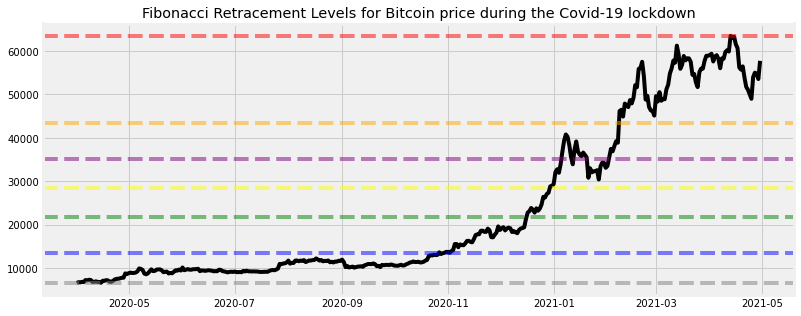

In [235]:
# Plotting the Fibonacci Level Prices with the Close price for Bitcoin during Covid-19 Lockdown

plt.figure(figsize=(12,5))
plt.plot(BTC.index, BTC["Close"], color = "black")

plt.xlabel = ("Date")
plt.ylabel = ("Price in (USD)")
plt.title("Fibonacci Retracement Levels for Bitcoin price during the Covid-19 lockdown")

plt.axhline(max_price, linestyle = "--", alpha = 0.5, color = "red")
plt.axhline(first_lvl, linestyle = "--", alpha = 0.5, color = "blue")
plt.axhline(second_lvl, linestyle = "--", alpha = 0.5, color = "yellow")
plt.axhline(third_lvl, linestyle = "--", alpha = 0.5, color = "green")
plt.axhline(fourth_lvl, linestyle = "--", alpha = 0.5, color = "purple")
plt.axhline(fifth_lvl, linestyle = "--", alpha = 0.5, color = "orange")
plt.axhline(min_price, linestyle = "--", alpha = 0.5, color = "gray")

# Fibonacci retracements are very popular among traders and it’s very important to use this tool in a wide time range in order to increase the Reward/Risk ratio.
# Obviously, this tool must not be used alone, I need to build a complete strategy exploiting, for example, multi-timeframe analysis.

#### Moving Averages:
##### Moving averages are measures of momentum over a series of observed values. These measures are commonly made across a subset of values within a larger set. This subset, known as the lookback period, offers different functional insights based on its value.


In [236]:
# In our case we have to use 10 and 5 days moving averages because we have only one year (not enough data). ATTENTION: This model is only for education purposes and we are using a 1-4 scale!
# Simple Moving Average (SMA): Represents the mean value across a period of n-previous observations. Common lookback periods include 50, 100, and 200-period trailing values.
# Exponential Moving Average (EMA): Represents a weighted mean across a period of n-previous observations where values closest to the most recent are given exponentially larger consideration.

simple_AND_exponential_moving_averages = ta.Strategy(
    name = "moving indicators",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "ema", "length": 5},
    ]
)
BTC.ta.strategy(simple_AND_exponential_moving_averages)
BTC.ta.cores = 0

In [237]:
fig = go.Figure(data=[
    go.Candlestick(
        x=BTC.index,
        open=BTC['Open'],
        high=BTC['High'],
        low=BTC['Low'],
        close=BTC['Close'],
        increasing_line_color='orange',
        decreasing_line_color='black',
        showlegend=False,
    ),
])
fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['SMA_10'],
        line=dict(color='red', width=2),
        name='SMA_10',
    )
)

fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['EMA_5'],
        line=dict(color='green', width=2),
        name='EMA_5'
    )
)
fig.show()

##### In this visualization, we can see the 10-period simple moving average (red line) charting against the 5-period exponential moving average (green line.) Visualized together, we can see a shift in momentum in many areas where the EMA crosses the SMA. Given the EMA reflects a faster change in price momentum, this crossover pattern is often used as a composite technical indicator to forecast emerging price trends.

In [238]:
# Golden Cross:
# The golden cross occurs when a short-term moving average crosses over a major long-term moving average to the upside and is interpreted by analysts and traders as signaling a definitive upward turn in a market. 
# Basically, the short-term average trends up faster than the long-term average, until they cross.

BTC['golden_cross'] = np.where(BTC['SMA_10'] > BTC['EMA_5'],"SELL","BUY")
BTC.dropna(inplace=True)

In [239]:
# Death Cross:
# Conversely, a similar downside moving average crossover constitutes the death cross and is understood to signal a decisive downturn in a market. 
# The death cross occurs when the short-term average trends down and crosses the long-term average, basically going in the opposite direction of the golden cross.

BTC['death_cross'] = np.where(BTC['SMA_10'] < BTC['EMA_5'],"SELL","BUY")
BTC.dropna(inplace=True)
BTC

,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_5,golden_cross,death_cross
Date,,,,,,,,,,
2020-04-10,7303.815430,7303.815430,6802.475098,6865.493164,6865.493164,43622840992,6974.232178,7075.306248,BUY,SELL
2020-04-11,6867.440430,6926.069824,6789.920898,6859.083008,6859.083008,31222085946,6999.462842,7003.231835,BUY,SELL
2020-04-12,6858.067871,7119.947266,6811.078125,6971.091797,6971.091797,35759567632,7017.209570,6992.518489,SELL,BUY
2020-04-13,6965.616699,6965.616699,6668.259766,6845.037598,6845.037598,38619308647,7028.374609,6943.358192,SELL,BUY
2020-04-14,6843.281738,6958.557129,6793.821289,6842.427734,6842.427734,34110434052,7025.864648,6909.714706,SELL,BUY
...,...,...,...,...,...,...,...,...,...,...
2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,53893.619141,52204.115419,SELL,BUY
2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,53328.548828,53147.116009,SELL,BUY
2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955,53189.400781,53706.311714,BUY,SELL


## BTC Analysis: III - After Covid-19 Lockdown Period:

In [240]:
BTC = yf.download("BTC-USD", start_date_after_locksown, end_date_after_lockdown)
BTC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-01,57714.664062,58448.339844,57052.273438,57828.050781,57828.050781,42836427360
2021-05-02,57825.863281,57902.593750,56141.906250,56631.078125,56631.078125,38177405335
2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,57200.292969,51713139031
2021-05-04,57214.179688,57214.179688,53191.425781,53333.539062,53333.539062,68564706967
2021-05-05,53252.164062,57911.363281,52969.054688,57424.007812,57424.007812,69241316747
...,...,...,...,...,...,...
2022-04-28,39241.429688,40269.464844,38941.421875,39773.828125,39773.828125,33903704907
2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,30882994649
2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,23895713731


In [241]:
BTC_closing_during_ld = BTC["Close"].hvplot(
    label = "Bitcoin Closing Prices during Covid-19 lockdown",
    width = 900,
    height = 400
)
BTC_closing_during_ld

:Curve   [Date]   (Close)

*The Fibonacci Sequence:*

In [242]:
# Creating and generating the Fibonacci Sequence of 20 numbers through a function created for this Project!

sequence = fibonacci_sequence(20)
print(sequence)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


*What are Fibonacci retracements?*

In [243]:
# Fibonacci retracements are particular key levels calculated according to 2 swings, i.e. inversion points. 
# The idea behind Fibonacci retracements is to create some key levels in the price range between these two swings according to pre-defined fractions. 
# The most important fraction is 0.618, which is related to the golden ratio (1.618…). That’s why they are called Fibonacci retracements. Other ratios are 0.5, 0.236, 0.382, 0.786.

for i in sequence:
    rt_1 = sequence[-4] / sequence[-1]
    rt_2 = 0.5
    rt_3 = sequence[-3] / sequence[-1]    
    rt_4 = sequence[-2] / sequence[-1]
    rt_5 = 1 - rt_1

print(rt_1,rt_2,rt_3,rt_4,rt_5)

0.2360679970436068 0.5 0.3819660014781966 0.6180339985218034 0.7639320029563932


In [244]:
# Calculating the Fibonacci Retracement Level Prices and a non_Fibonacci Level/Ratio of 0.5 or 50%. 
# Three Fibonacci Ratios are what I am going to use: 0.236, 0.382 and 0.618

max_price = BTC["Close"].max()
min_price = BTC["Close"].min()

diff = max_price - min_price

print("Level Percentage      Price in USD ")
print("00.0%\t\t", max_price)

first_lvl = diff * rt_1
print("23.6%\t\t", first_lvl)

second_lvl = diff * rt_2
print("38.2%\t\t", second_lvl)

third_lvl = diff * rt_3
print("50.0%\t\t", third_lvl)

fourth_lvl = diff * rt_4
print("61.8%\t\t", fourth_lvl)

fifth_lvl = diff * rt_5
print("76.5%\t\t", fifth_lvl)

print("100.0%\t\t", min_price)

Level Percentage      Price in USD 
00.0%		 67566.828125
23.6%		 8913.804923665004
38.2%		 18879.740234375
50.0%		 14422.837772542498
61.8%		 23336.642696207502
76.5%		 28845.675545084996
100.0%		 29807.34765625


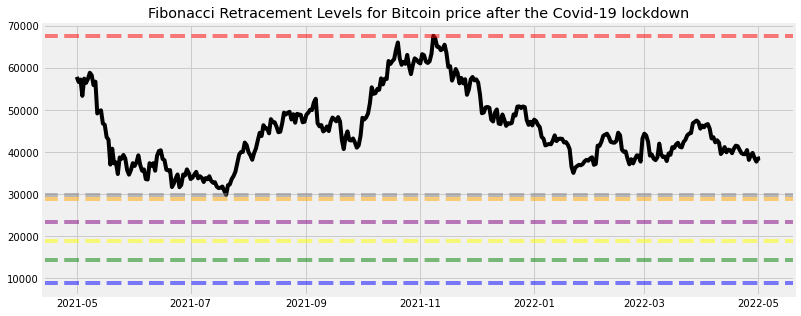

In [245]:
# Plotting the Fibonacci Level Prices with the Close price for Bitcoin during Covid-19 Lockdown

plt.figure(figsize=(12,5))
plt.plot(BTC.index, BTC["Close"], color = "black")

plt.xlabel = ("Date")
plt.ylabel = ("Price in (USD)")
plt.title("Fibonacci Retracement Levels for Bitcoin price after the Covid-19 lockdown")

plt.axhline(max_price, linestyle = "--", alpha = 0.5, color = "red")
plt.axhline(first_lvl, linestyle = "--", alpha = 0.5, color = "blue")
plt.axhline(second_lvl, linestyle = "--", alpha = 0.5, color = "yellow")
plt.axhline(third_lvl, linestyle = "--", alpha = 0.5, color = "green")
plt.axhline(fourth_lvl, linestyle = "--", alpha = 0.5, color = "purple")
plt.axhline(fifth_lvl, linestyle = "--", alpha = 0.5, color = "orange")
plt.axhline(min_price, linestyle = "--", alpha = 0.5, color = "gray")

# Fibonacci retracements are very popular among traders and it’s very important to use this tool in a wide time range in order to increase the Reward/Risk ratio.
# Obviously, this tool must not be used alone, I need to build a complete strategy exploiting, for example, multi-timeframe analysis.

#### Moving Averages:
##### Moving averages are measures of momentum over a series of observed values. These measures are commonly made across a subset of values within a larger set. This subset, known as the lookback period, offers different functional insights based on its value.


In [246]:
# In our case we have to use 10 and 5 days moving averages because we have only one year (not enough data). ATTENTION: This model is only for education purposes and we are using a 1-4 scale!
# Simple Moving Average (SMA): Represents the mean value across a period of n-previous observations. Common lookback periods include 50, 100, and 200-period trailing values.
# Exponential Moving Average (EMA): Represents a weighted mean across a period of n-previous observations where values closest to the most recent are given exponentially larger consideration.

simple_AND_exponential_moving_averages = ta.Strategy(
    name = "moving indicators",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "ema", "length": 5},
    ]
)
BTC.ta.strategy(simple_AND_exponential_moving_averages)
BTC.ta.cores = 0

In [247]:
fig = go.Figure(data=[
    go.Candlestick(
        x=BTC.index,
        open=BTC['Open'],
        high=BTC['High'],
        low=BTC['Low'],
        close=BTC['Close'],
        increasing_line_color='orange',
        decreasing_line_color='black',
        showlegend=False,
    ),
])
fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['SMA_10'],
        line=dict(color='red', width=2),
        name='SMA_10',
    )
)

fig.add_trace(
    go.Scatter(
        x=BTC.index,
        y=BTC['EMA_5'],
        line=dict(color='green', width=2),
        name='EMA_5'
    )
)
fig.show()

##### In this visualization, we can see the 10-period simple moving average (red line) charting against the 5-period exponential moving average (green line.) Visualized together, we can see a shift in momentum in many areas where the EMA crosses the SMA. Given the EMA reflects a faster change in price momentum, this crossover pattern is often used as a composite technical indicator to forecast emerging price trends.

In [248]:
# Golden Cross:
# The golden cross occurs when a short-term moving average crosses over a major long-term moving average to the upside and is interpreted by analysts and traders as signaling a definitive upward turn in a market. 
# Basically, the short-term average trends up faster than the long-term average, until they cross.

BTC['golden_cross'] = np.where(BTC['SMA_10'] > BTC['EMA_5'],"SELL","BUY")
BTC.dropna(inplace=True)

In [249]:
# Death Cross:
# Conversely, a similar downside moving average crossover constitutes the death cross and is understood to signal a decisive downturn in a market. 
# The death cross occurs when the short-term average trends down and crosses the long-term average, basically going in the opposite direction of the golden cross.

BTC['death_cross'] = np.where(BTC['SMA_10'] < BTC['EMA_5'],"SELL","BUY")
BTC.dropna(inplace=True)
BTC

,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_5,golden_cross,death_cross
Date,,,,,,,,,,
2021-05-10,58250.871094,59519.355469,54071.457031,55859.796875,55859.796875,71776546298,56906.577734,57088.440837,BUY,SELL
2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,56704.574219,61308396325,56794.230078,56960.485298,BUY,SELL
2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907,56046.175781,54357.168584,SELL,BUY
2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926,55297.765625,52810.176191,SELL,BUY
2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453,54952.465234,51833.629180,SELL,BUY
...,...,...,...,...,...,...,...,...,...,...
2022-04-28,39241.429688,40269.464844,38941.421875,39773.828125,39773.828125,33903704907,39969.155469,39506.966219,SELL,BUY
2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,30882994649,39679.862891,39207.918885,SELL,BUY
2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,23895713731,39313.912500,38710.237590,SELL,BUY


In [250]:
# We compute our death cross
#df["death_cross"] = df.apply(lambda row: 1 if row[f"50_sma"] < row[f"200_sma"]  else 0, axis=1)

# To store when our death crosses are happening
list_death_cross_ts = []
first_death_cross = False

# We take the date where the first 50 SMA < 200 SMA appears
for idx, each in df["death_cross"].iteritems():
    if each == 1:
        # If its the first death cross we see we add the timestamp
        if first_death_cross:
            list_death_cross_ts.append(idx)
            first_death_cross = False
    else:
        first_death_cross = True

# We plot our prices / SMAs and Death Cross dates
fig, axes = plt.subplots(1,1, figsize=(8,4))
df[["200_sma","50_sma","Adj Close"]].plot(figsize=(8,4), grid=True, title="SMA 50 vs SMA 200 on AAPL prices", ax=axes)

for each in list_death_cross_ts:
    axes.axvline(x=each, label="Death Cross", c="black")
    
axes.legend()
fig.tight_layout()
plt.savefig("death_cross_python.png")

NameError: name 'df' is not defined

In [ ]:
# Downloading data for 3-years for Bitcoin

BTC = yf.download("BTC-USD", start_date_pre_lockdown, end_date_after_lockdown)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Bitcoin during these three years had a wild run with a price fluctuating good morning 

BTC.Close.hvplot(width = 1100)

:Curve   [Date]   (Close)

In [ ]:
	
from ta.momentum import RSIIndicator
from ta.trend import macd

In [ ]:
rsi_20 = RSIIndicator(close = BTC.Close, window = 20)
 
BTC["rsi_20"] = rsi_20.rsi().dropna()
BTC


,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_5,golden_cross,rsi_20
Date,,,,,,,,,,
2019-03-23,4022.713379,4049.882568,4015.964600,4035.826416,4035.826416,9578850549,NaN,NaN,BUY,NaN
2019-03-24,4035.163574,4040.699707,4006.192871,4022.168213,4022.168213,9144851065,NaN,NaN,SELL,NaN
2019-03-25,4024.112793,4038.840820,3934.031250,3963.070557,3963.070557,10359818883,NaN,NaN,SELL,NaN
2019-03-26,3969.228760,3985.080811,3944.753174,3985.080811,3985.080811,10707678815,NaN,NaN,SELL,NaN
2019-03-27,3984.244873,4087.066162,3977.810547,4087.066162,4087.066162,10897131934,NaN,4018.642432,SELL,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,6242.193848,34885225901,6366.590674,6417.520240,BUY,41.060392
2020-03-29,6245.624512,6250.467285,5920.085938,5922.042969,5922.042969,28373690931,6339.675684,6252.361149,SELL,38.836874
2020-03-30,5925.538574,6517.195801,5903.234375,6429.841797,6429.841797,37101651525,6362.782031,6311.521365,SELL,43.908295


In [ ]:
BTC["macd"] = macd(BTC.Close, window_slow = 26, window_fast = 12)
BTC.dropna(inplace=True)
BTC

,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_5,golden_cross,rsi_20,macd
Date,,,,,,,,,,,
2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,5179.222266,5186.383212,BUY,72.189179,260.920569
2019-04-18,5251.480469,5319.986328,5250.506836,5298.385742,5298.385742,13256489918,5180.083740,5223.717389,BUY,73.118908,258.668346
2019-04-19,5298.154297,5336.680176,5233.334961,5303.812500,5303.812500,13780238655,5189.969141,5250.415759,BUY,73.228976,254.388900
2019-04-20,5304.160645,5358.490723,5295.877930,5337.886230,5337.886230,13169647522,5191.302588,5279.572583,BUY,73.934378,250.855172
2019-04-21,5335.878906,5359.924805,5257.339355,5314.531250,5314.531250,13731844223,5216.306934,5291.225472,BUY,72.555025,243.364757
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,6242.193848,34885225901,6366.590674,6417.520240,BUY,41.060392,-447.228067
2020-03-29,6245.624512,6250.467285,5920.085938,5922.042969,5922.042969,28373690931,6339.675684,6252.361149,SELL,38.836874,-451.083338
2020-03-30,5925.538574,6517.195801,5903.234375,6429.841797,6429.841797,37101651525,6362.782031,6311.521365,SELL,43.908295,-408.455130
